Shape: (20, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         20 non-null     int64  
 1   age                20 non-null     int64  
 2   gender             20 non-null     object 
 3   ethnicity          20 non-null     object 
 4   height_cm          20 non-null     int64  
 5   weight_kg          20 non-null     int64  
 6   bmi                20 non-null     float64
 7   blood_pressure     20 non-null     int64  
 8   cholesterol        20 non-null     int64  
 9   glucose            20 non-null     int64  
 10  smoking_status     20 non-null     object 
 11  diabetes_status    20 non-null     object 
 12  physical_activity  20 non-null     object 
 13  family_history     20 non-null     object 
 14  cardio_risk        20 non-null     int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 2.5+ KB
Mis

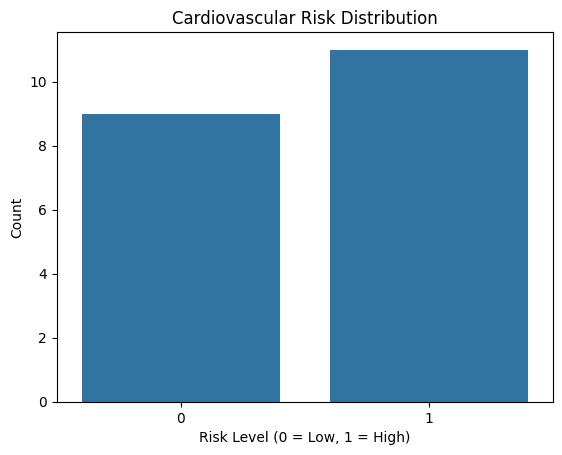

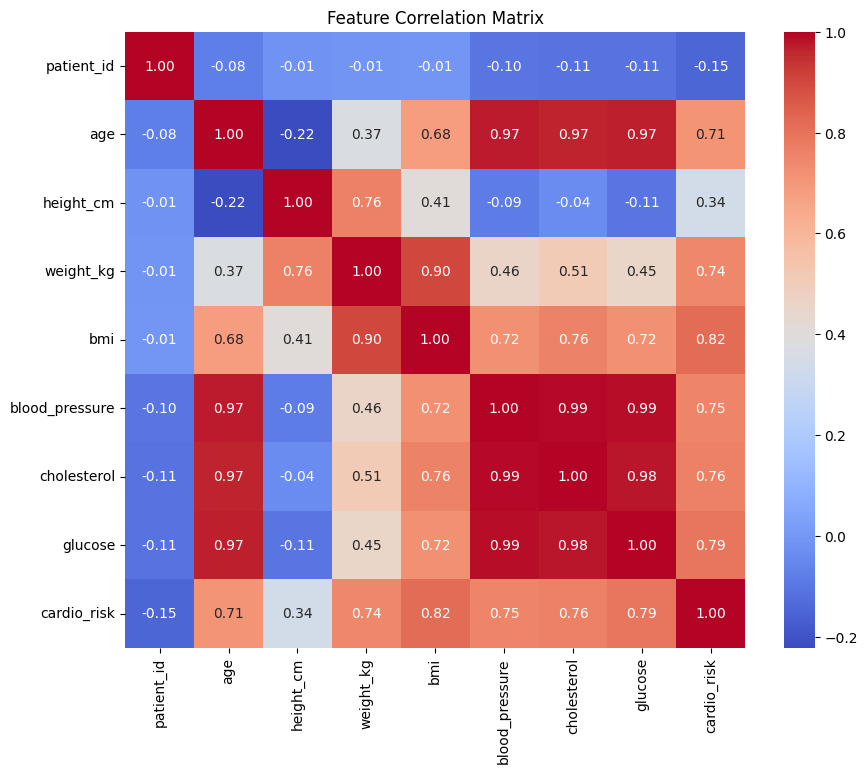

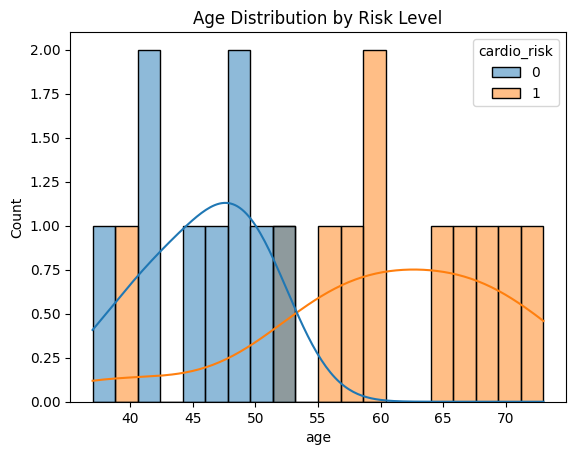

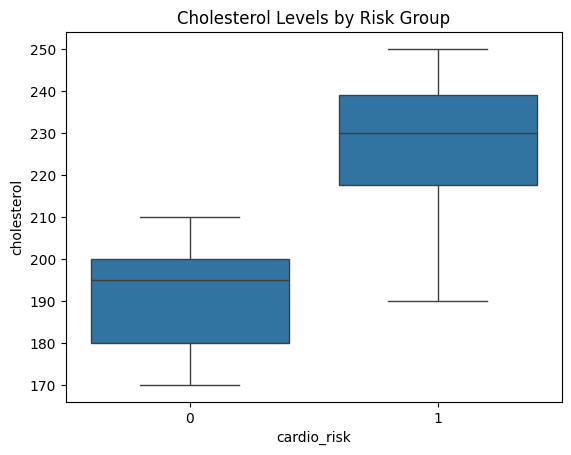

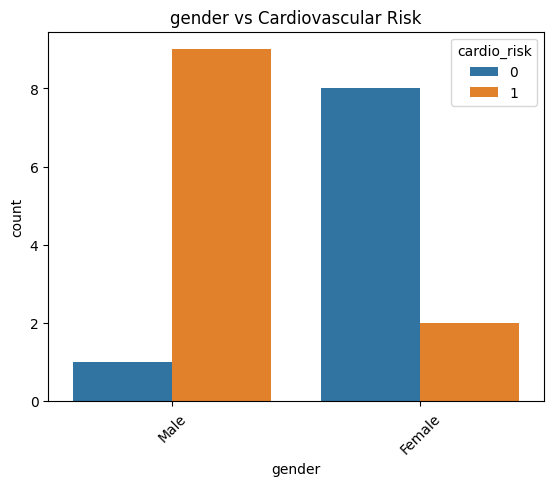

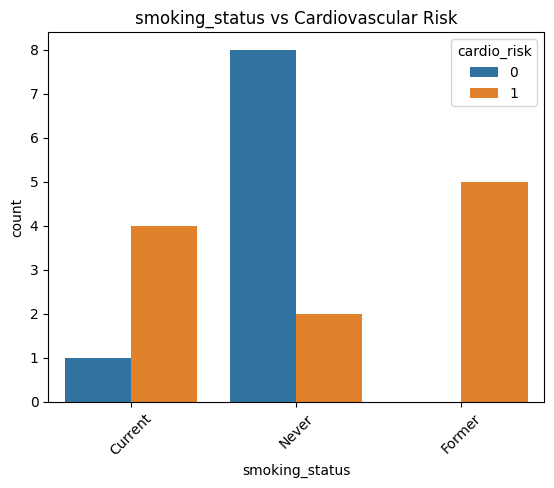

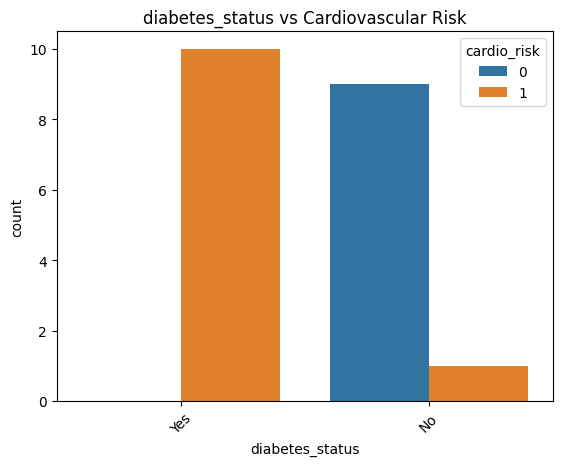

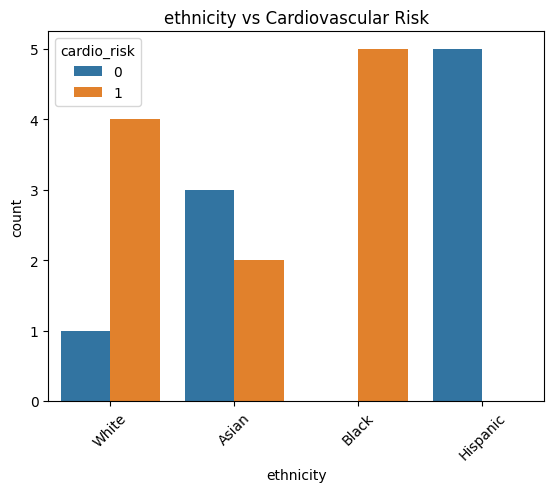

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/synthetic_patients.csv')

# Preview data
df.head()

# Basic info
print("Shape:", df.shape)
df.info()

# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Summary statistics
df.describe()

# Class distribution
sns.countplot(x='cardio_risk', data=df)
plt.title("Cardiovascular Risk Distribution")
plt.xlabel("Risk Level (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

# Correlation matrix (numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Age distribution by risk
sns.histplot(data=df, x='age', hue='cardio_risk', bins=20, kde=True)
plt.title("Age Distribution by Risk Level")
plt.show()

# Boxplot for cholesterol
sns.boxplot(x='cardio_risk', y='cholesterol', data=df)
plt.title("Cholesterol Levels by Risk Group")
plt.show()

# Pairplot (optional for small datasets)
# sns.pairplot(df, hue='cardio_risk')

# Categorical feature analysis
categorical = ['gender', 'smoking_status', 'diabetes_status', 'ethnicity']
for col in categorical:
    plt.figure()
    sns.countplot(x=col, hue='cardio_risk', data=df)
    plt.title(f"{col} vs Cardiovascular Risk")
    plt.xticks(rotation=45)
    plt.show()
